Load data into dataframe from previously created dataset (joined FourSquare & City Bikes dataframes)

In [89]:
import pandas as pd

bike_foursquare_df = pd.read_csv('../data/foursquare_df.csv')

In [90]:
#View start of dataframe
bike_foursquare_df.head()

,id,name,latitude,longitude,bike_slots,public_art,night_club,bicycle_store,coffee_shop,fast_food,museum,grocery_store
0,00fa94ad698dc4a9e4d708d6fd32f294,Chilco & Barclay,49.291909,-123.140713,18,0,1,5,16,14,1,11
1,012d3e06901cc222b1c2cf0a2ace3a29,St George & Broadway,49.262321,-123.093060,14,1,2,1,10,3,0,8
2,029a505bd4422a1afd127987757f71a6,Britannia Parking Lot,49.275882,-123.071865,14,0,1,4,21,1,0,12
3,0438114d2e6b96118de69bc9775bb21e,Morton & Denman,49.288030,-123.142135,26,1,1,1,16,11,0,8
4,0459b7e93703980b853cd65a9dc60596,Thornton & National,49.273777,-123.092723,14,0,0,0,7,4,0,11


In [91]:
#Create a total points of interest (POI) column
columns_to_sum=['public_art', 'night_club', 'bicycle_store', 'coffee_shop', 'fast_food', 'museum', 'grocery_store']
bike_foursquare_df['total_poi'] = bike_foursquare_df[columns_to_sum].sum(axis=1)
bike_foursquare_df 

,id,name,latitude,longitude,bike_slots,public_art,night_club,bicycle_store,coffee_shop,fast_food,museum,grocery_store,total_poi
0,00fa94ad698dc4a9e4d708d6fd32f294,Chilco & Barclay,49.291909,-123.140713,18,0,1,5,16,14,1,11,48
1,012d3e06901cc222b1c2cf0a2ace3a29,St George & Broadway,49.262321,-123.093060,14,1,2,1,10,3,0,8,25
2,029a505bd4422a1afd127987757f71a6,Britannia Parking Lot,49.275882,-123.071865,14,0,1,4,21,1,0,12,39
3,0438114d2e6b96118de69bc9775bb21e,Morton & Denman,49.288030,-123.142135,26,1,1,1,16,11,0,8,38
4,0459b7e93703980b853cd65a9dc60596,Thornton & National,49.273777,-123.092723,14,0,0,0,7,4,0,11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,fbb4c06b719596c21f91fd51ef6d4710,7th & Heather,49.265089,-123.119425,18,1,0,2,29,9,0,5,46
254,fe0c57d04d6e682d284d501446095fc9,Union & Dunlevy,49.277595,-123.095830,16,0,1,2,21,8,2,30,64
255,fedff7a263c182df94bda7307059cc52,Richards & Helmcken,49.277141,-123.122589,18,1,24,4,50,32,2,29,142
256,fef69fb400210d861107a61db954d037,Keefer & Abbott,49.279821,-123.108020,28,4,15,2,50,16,11,16,114


In [92]:
bike_foursquare_df.shape

(258, 13)

In [93]:
bike_foursquare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             258 non-null    object 
 1   name           258 non-null    object 
 2   latitude       258 non-null    float64
 3   longitude      258 non-null    float64
 4   bike_slots     258 non-null    int64  
 5   public_art     258 non-null    int64  
 6   night_club     258 non-null    int64  
 7   bicycle_store  258 non-null    int64  
 8   coffee_shop    258 non-null    int64  
 9   fast_food      258 non-null    int64  
 10  museum         258 non-null    int64  
 11  grocery_store  258 non-null    int64  
 12  total_poi      258 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 26.3+ KB


In [94]:
bike_foursquare_df.describe()

,latitude,longitude,bike_slots,public_art,night_club,bicycle_store,coffee_shop,fast_food,museum,grocery_store,total_poi
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,49.271571,-123.123022,18.662791,0.624031,3.112403,3.158915,20.112403,10.391473,1.259690,9.321705,47.980620
std,0.011641,0.039317,5.429299,0.959351,5.385432,3.961136,15.194938,12.652411,2.260816,7.256367,39.036295
min,49.238105,-123.254307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.263115,-123.139179,16.000000,0.000000,0.000000,1.000000,8.000000,2.000000,0.000000,4.000000,20.000000
50%,49.270830,-123.118546,18.000000,0.000000,1.000000,2.000000,16.000000,7.000000,0.000000,7.000000,36.500000
75%,49.280403,-123.100094,20.000000,1.000000,3.000000,4.000000,28.000000,12.000000,1.000000,13.000000,65.000000
max,49.302577,-123.056909,40.000000,4.000000,27.000000,24.000000,50.000000,50.000000,13.000000,38.000000,150.000000


In [95]:
bike_foursquare_df['bike_slots'].value_counts().sort_index()

bike_slots
0      3
12    12
14    47
15     1
16    44
17     1
18    44
19     1
20    45
22    18
23     1
24    10
25     1
26    11
28     9
30     3
32     2
36     2
38     1
40     2
Name: count, dtype: int64

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

<Axes: xlabel='bike_slots', ylabel='Count'>

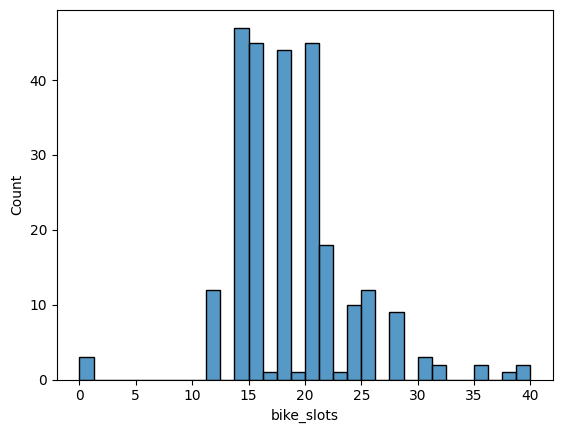

In [96]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

sns.histplot(bike_foursquare_df['bike_slots'])


In [113]:
#View outliers for bike_slots
from scipy import stats

#Find absolute z scores
bike_z_score = np.abs(stats.zscore(bike_foursquare_df['bike_slots']))
bike_foursquare_df['bike_slot_z_score'] = bike_z_score

#Drop outliers with z score > 3
bike_slot_outliers = bike_foursquare_df['bike_slots'][bike_z_score > 3]
bike_foursquare_df_filtered = bike_foursquare_df[bike_foursquare_df['bike_slot_z_score'] <= 3]
bike_foursquare_df_filtered = bike_foursquare_df_filtered.drop(columns=['bike_slot_z_score'])
bike_foursquare_df_filtered.shape

#Drop all columns with a score of exact 50 as this is the maximum results and not an example of valid data
mask = (bike_foursquare_df_filtered == 50).any(axis=1)
print(mask)

#Find only the opposite of mask (~)
bike_foursquare_df_filtered = bike_foursquare_df_filtered[~mask]
bike_foursquare_df_filtered.shape


0      False
1      False
2      False
3      False
4      False
       ...  
253    False
254    False
255     True
256     True
257    False
Length: 250, dtype: bool


(217, 13)

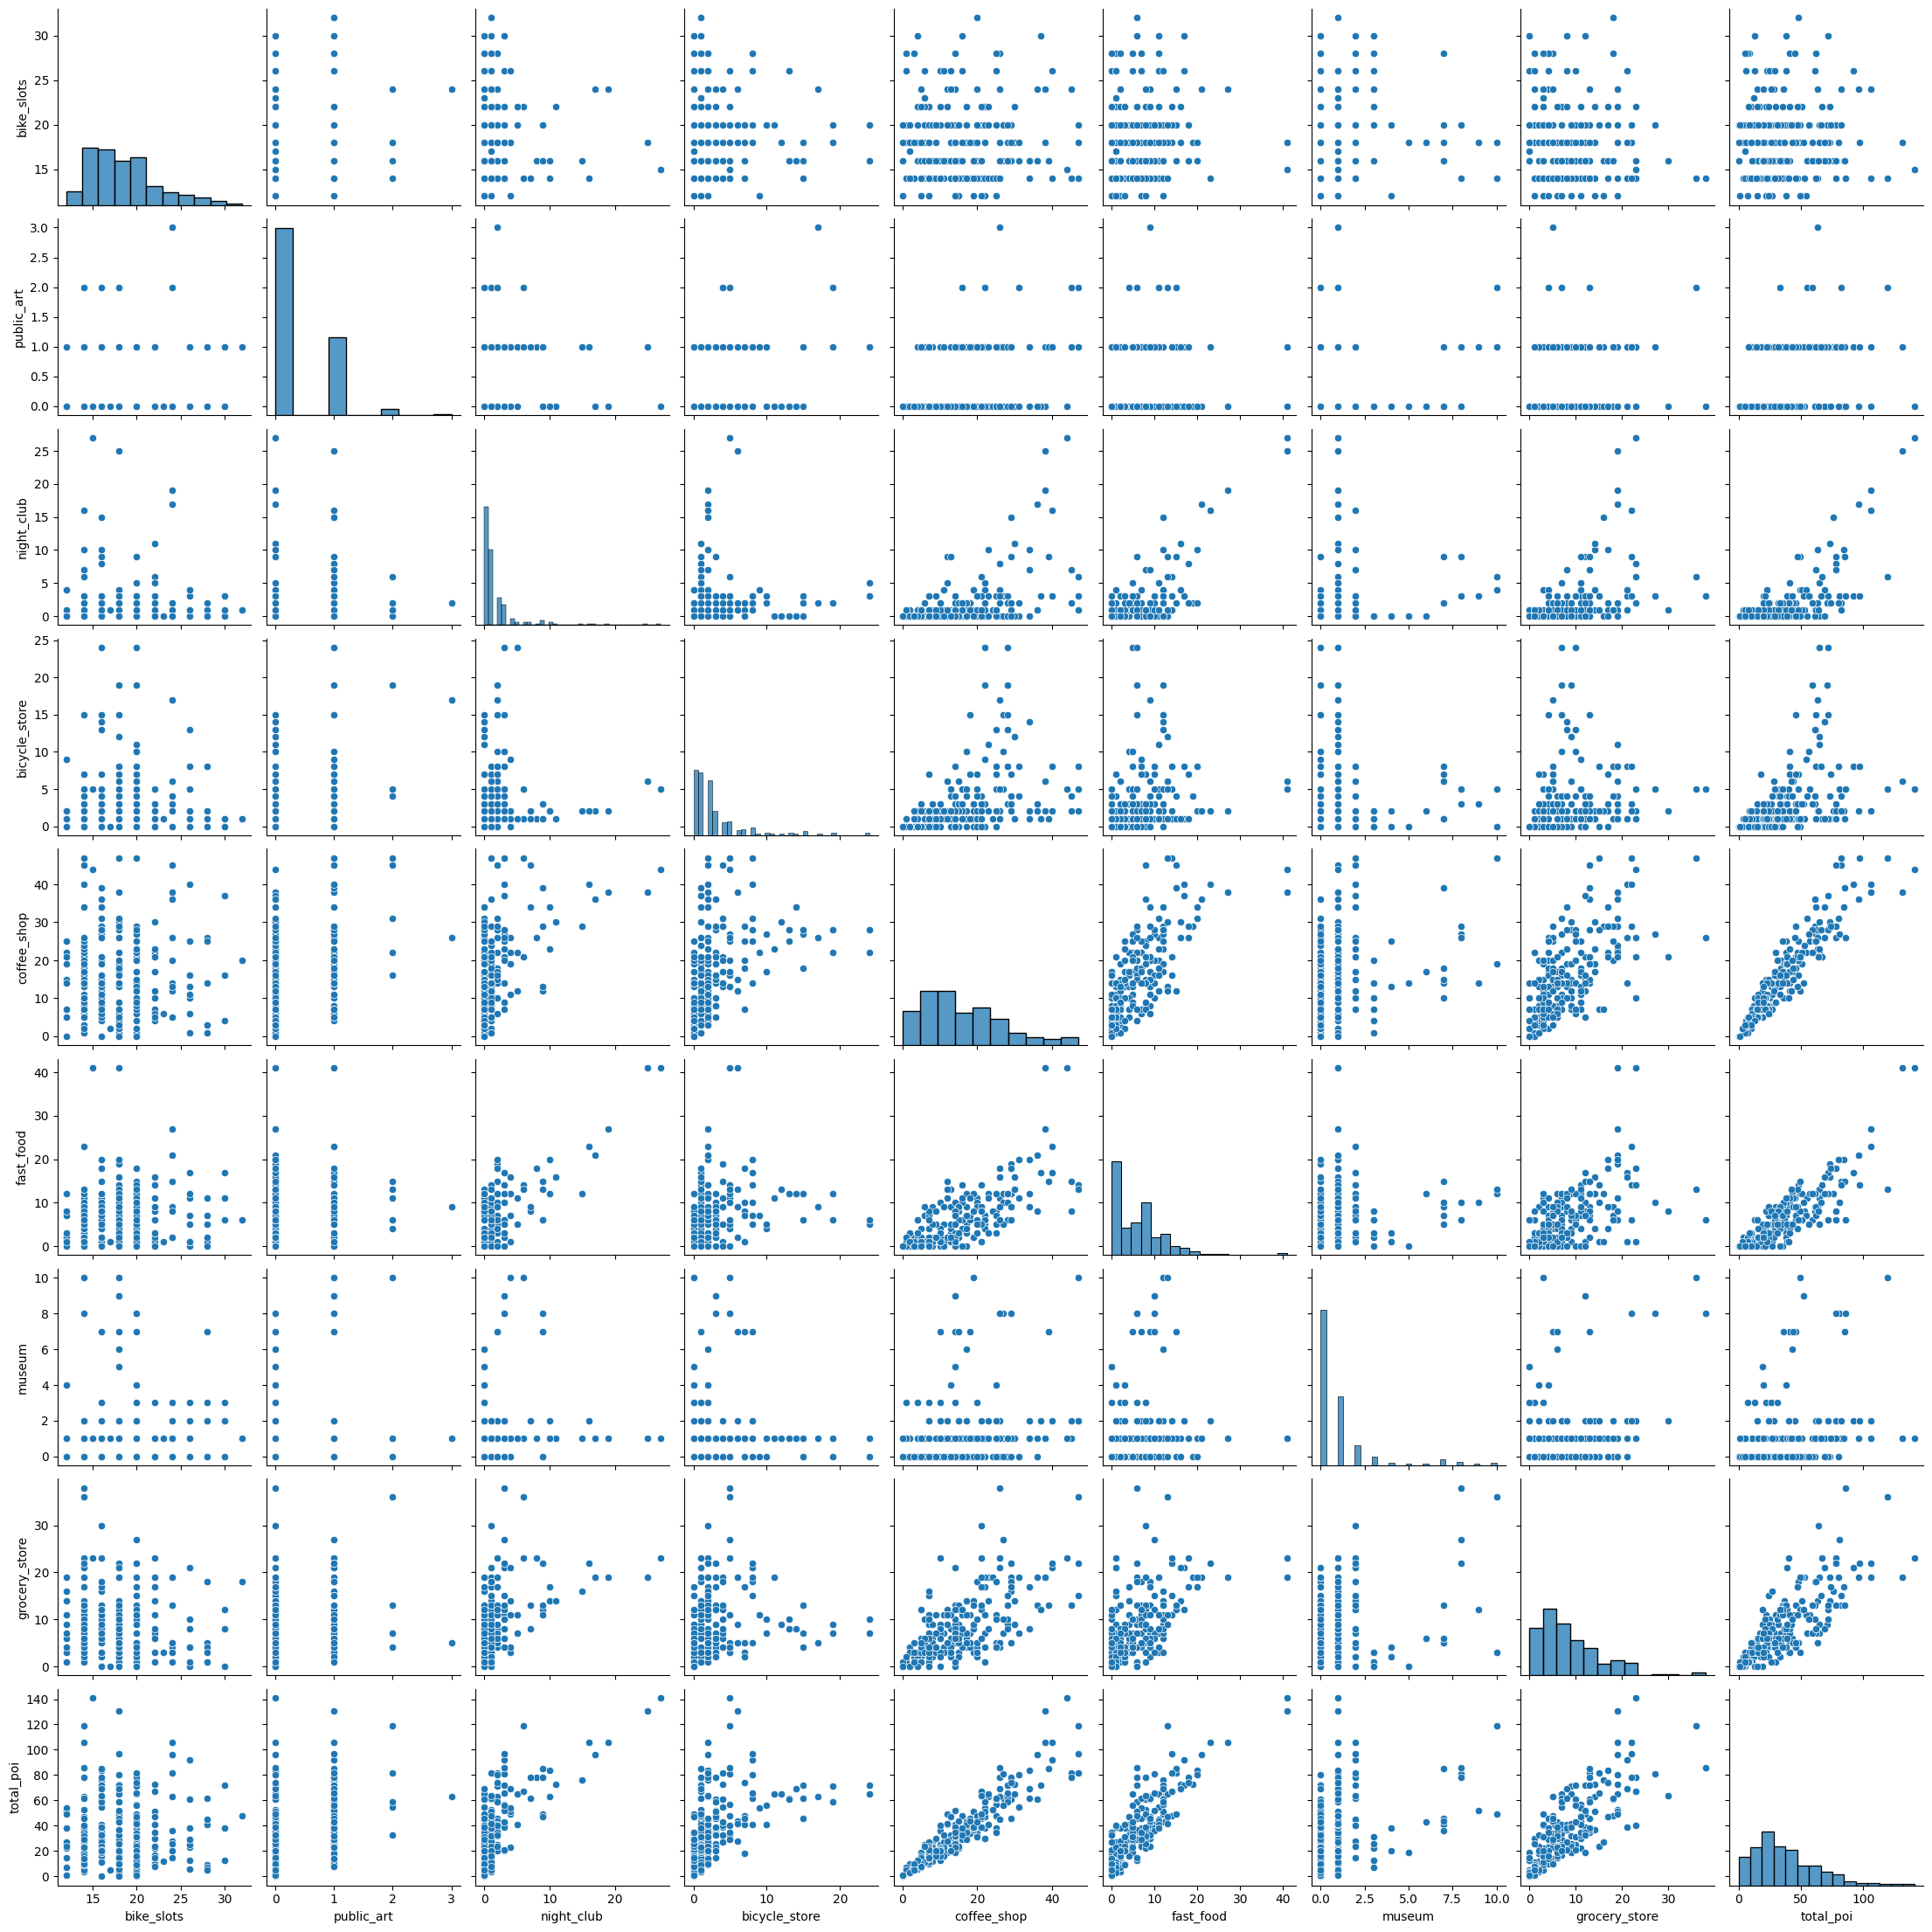

In [114]:
sns.pairplot(bike_foursquare_df_filtered[['bike_slots', 
                        'public_art', 
                        'night_club', 
                        'bicycle_store', 
                        'coffee_shop', 
                        'fast_food', 
                        'museum', 
                        'grocery_store', 
                        'total_poi']])
plt.show()

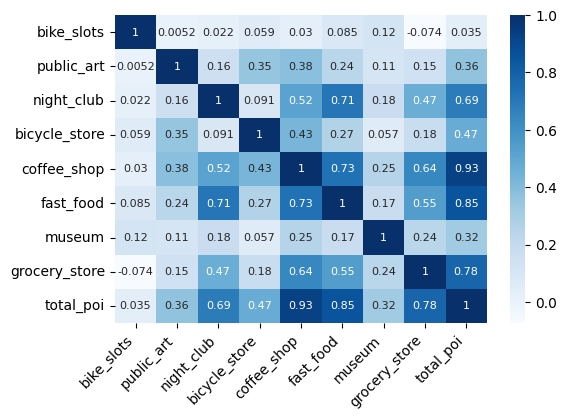

In [115]:
#Setup numeric only dataframe
numeric_df = bike_foursquare_df_filtered.select_dtypes(include=[np.number])
numeric_df = numeric_df.drop(columns=['latitude', 'longitude'])

#Setup figures details
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, annot_kws={'fontsize': 8})
plt.xticks(rotation=45, ha='right')
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [116]:
import sqlite3 as sqlite
import pandas as pd
from sqlalchemy import create_engine

In [117]:
#Create database
connection = sqlite.connect('../data/bike_foursquare.db')

In [118]:
#Convert dataframe to database
bike_foursquare_df_filtered.to_sql('places', connection, if_exists='replace', index=False)

217

Look at the data before and after the join to validate your data.

In [119]:
#Query the DB
query = pd.read_sql('SELECT * FROM places', connection)
print(query)

                                   id                   name   latitude  \
0    00fa94ad698dc4a9e4d708d6fd32f294       Chilco & Barclay  49.291909   
1    012d3e06901cc222b1c2cf0a2ace3a29   St George & Broadway  49.262321   
2    029a505bd4422a1afd127987757f71a6  Britannia Parking Lot  49.275882   
3    0438114d2e6b96118de69bc9775bb21e        Morton & Denman  49.288030   
4    0459b7e93703980b853cd65a9dc60596    Thornton & National  49.273777   
..                                ...                    ...        ...   
212  f90ed7ad754ec04b7852941a480a4c77        Balaclava & 6th  49.266924   
213  fad9ebcf614dd1a72593a34072ff76f8     Helmcken & Burrard  49.279938   
214  fbb4c06b719596c21f91fd51ef6d4710          7th & Heather  49.265089   
215  fe0c57d04d6e682d284d501446095fc9        Union & Dunlevy  49.277595   
216  fffd87607aaae16fbb1f71615cbe7d17    8th & Prince Edward  49.263518   

      longitude  bike_slots  public_art  night_club  bicycle_store  \
0   -123.140713          18  